In [1]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print(sympy.__version__)
init_printing(use_unicode=True)
x, g, X = symbols('x g X', cls = Function)

1.11.1


## Check that get desired properties for basic ftns

In [2]:
laplace_transform(Heaviside(t,0), t, s, noconds = True) # Checking the performance of the Laplace Transform Module

In [3]:
g = DiracDelta(t)
laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1.

## Define the LP of the second order diff eq

In [4]:
case = 0
# define the differential equation to solve
if case == 0:
    # input is a delta
    x0 = 1
    v0 = 2
    a = 2
    b = 7
    c = 3
    d = 1
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
elif case == 1:
    # input is a delta
    x0 = 2
    v0 = 4
    a = 1
    b = 5
    c = 6
    d = 4
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
elif case == 2:
    # input is a step
    a = 1
    b = 5
    c = 6
    d = 1
    W = laplace_transform(d*Heaviside(t,0), t, s, noconds = True)
    xp = d/c
    ev = np.roots([a, b, c])
    const = inv([[1,1],[ev[0],ev[1]]])@[[x0-xp],[v0]]
    #print(const)

eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), W)
eom.replace(Heaviside(0), 0)

### Solve for the laplace transformed value that must be inverse transformed

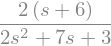

In [5]:
Xofs = solve(eom,X(s))[0]
Xofs

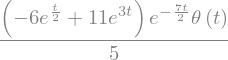

In [6]:
soln = inverse_laplace_transform(Xofs,s,t)
soln

In [7]:
# compute soln at time 0 to confirm that x(0) = x0
soln_x0 = soln.replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)
if case < 2:
    print(f'Initial condition x(0) was '+str(x0p)+' and is '+str(soln_x0))
else:
    print(f'Initial condition x(0) was {((const[0]+const[1]+xp)[0]):.2f} and is '+str(soln_x0))    

Initial condition x(0) was 1 and is 1


In [8]:
# compute soln at time 0 to confirm that x(0) = x0
soln_v0 = soln.diff(t).replace(Heaviside(t), 1).subs(t,0).replace(DiracDelta(0), 0)
if case < 2:
    print(f'Initial condition v(0) was '+str(v0p)+' and is '+str(float(soln_v0)))
else:
    print(f'Initial condition x(0) was {((ev[0]*const[0]+ev[1]*const[1])[0]):.2f} and is '+str(soln_v0))    

Initial condition v(0) was 2.5 and is 2.5


## Example 2

In [9]:
from sympy.abc import a, t, x, s, X, g, G
x, g, X = symbols('x g X', cls = Function)

In [10]:
x0 = 4
v0 = 7

In [11]:
eom  = Eq(3*(s**2 * X(s)-s*x0-v0)+30 * (s*X(s)-x0)+ 63 * X(s), 0)
eom

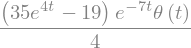

In [12]:
Xofs = solve(eom,X(s))
soln = inverse_laplace_transform(Xofs[0],s,t)
soln

In [13]:
y0 = soln.replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)
print(f'Pos IC was {x0:.1f} and is {y0:.2f}')

ydot = soln.diff(t).replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)
ydot0 = ydot.subs(t,0)
print(f'Vel IC was {v0:.1f} and is {ydot0:.2f}')

Pos IC was 4.0 and is 4.00
Vel IC was 7.0 and is 7.00


## Example 3

In [14]:
from sympy.abc import a, t, x, s, X, g, G 
init_printing(use_unicode=True)
x, g, X = symbols('x g X', cls = Function)

In [15]:
x0 = 5 
v0 = 7

[-3. -1.]


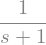

In [16]:
# a\ddot x + b\dot x + cx = dg
a = 2
b = 8
c = 6
d = 5
ev = np.roots([a,b,c])
print(ev) # check poles of system 

term = 0
if term == 0:
    g = sympy.exp(-t)*Heaviside(t)
    x0p = x0
    v0p = v0
elif term == 1:
    g = DiracDelta(t) 
    x0p = x0
    v0p = v0 + d/a
    
G = laplace_transform( g, t, s, noconds = True)
G

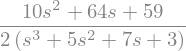

In [17]:
eom = Eq(a*(s**2 *X(s) -s*x0 - v0) + b*(s*X(s)-x0) + c*X(s), d*G)
Xofs = solve(eom,X(s)) 
Xofs[0]

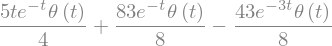

In [18]:
y_soln = expand(inverse_laplace_transform(Xofs[0],s,t))
y_soln

In [19]:
y0_pos = y_soln.subs(t,0+np.finfo(float).eps) 
print(f'y(0+) was {x0p:.2f} and is {y0_pos:.2f}')

y(0+) was 5.00 and is 5.00


In [20]:
ydot0_pos = y_soln.diff(t).replace(Heaviside(0), 1).subs(t,0).replace(DiracDelta(0), 0)  
print(f'dy/dt(0+) was {v0p:.2f} and is {ydot0_pos:.2f}')

dy/dt(0+) was 7.00 and is 7.00
